<a href="https://colab.research.google.com/github/aparnasahu5/lingo-bot/blob/main/Language_Detection_and_Translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


#**AI Project - Language Prediction**


---

> Sidharth Lal (19BCE2345), Suryaansh Jaiswal (19BCT0227) and Shreyas Guduri (19BCT0046)


### Importing the libraries

In [ ]:
import pandas as pd
import numpy as np

### Reading the dataset Language_Detection.csv

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving LangDataset.csv to LangDataset.csv


In [ ]:
import io
df = pd.read_csv('LangDataset.csv')

### Printing the first 10 records in the dataset

In [ ]:
df.head(10)


,Text,Language
0,the,English
1,and,English
2,to,English
3,of,English
4,a,English
5,in,English
6,is,English
7,that,English
8,for,English
9,I,English


### Printing the last 10 records in the dataset

In [ ]:
df.tail(10)

,Text,Language
13318,ಗಾಡಿಯಲ್ಲಿ ಮನೆಯಲ್ಲಿ ನಾರ್ಸಿಸ್ ಅವಳು ಮನೆಗೆ ತಲುಪಿದಾ...,Kannada
13319,ಅವಳು ಮನೆಯಲ್ಲಿ ಕುಳಿತಿದ್ದ ತನ್ನ ತಾಯಿಯನ್ನು ತಬ್ಬಿಕೊ...,Kannada
13320,ಓಹ್ ತಾಯಿ ನಾನು ನಿನ್ನನ್ನು ತುಂಬಾ ಪ್ರೀತಿಸುತ್ತೇನೆ ಮ...,Kannada
13321,"ಅವನು ಸುಂದರವಾಗಿದ್ದನು, ಅವನು ನನ್ನ ಬಗ್ಗೆ ಅಷ್ಟಾಗಿ ಕ...",Kannada
13322,ಓಹ್ ಇಲ್ಲ ನೀವು ನೋಡಿದಾಗಿನಿಂದ ಇದು ಸರಿಯಾಗಿದೆ.,Kannada
13323,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
13324,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
13325,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
13326,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada
13327,ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...,Kannada


### Information about the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13328 entries, 0 to 13327
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      13326 non-null  object
 1   Language  13328 non-null  object
dtypes: object(2)
memory usage: 208.4+ KB


### Counting the unique records in the "Language" column
*We have 17 languages and their corresponding unique words are shown below.*


In [ ]:
df["Language"].value_counts()

English       1884
French        1516
Spanish       1319
Italian       1198
German         971
Portugeese     739
Russian        692
Sweedish       676
Malayalam      594
Hindi          552
Dutch          546
Arabic         536
Turkish        474
Tamil          469
Danish         428
Kannada        369
Greek          365
Name: Language, dtype: int64

### Printing the shape of the dataset

In [ ]:
X = df["Text"]
y = df["Language"]
print(df.shape)

(13328, 2)


### Converting the categorical variables into numerical variables

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)



---


# **Creating a list for appending the preprocessed text**

---


### To help in cleaning up the data we we removed the unwanted characters such as punctuation marks, numbers,symbols and special characters so that we can extract only the required text from the dataset

**We convert all the text to lowercase characters**

In [ ]:
import re
df_list = []
for text in X:
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', str(text))
        text = re.sub(r'[[]]', ' ', str(text))
        text = text.lower()
        df_list.append(text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Possible nested set at position 1
  """


### To format the text into vectors

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df_list).toarray()
X.size

469772016



---


#**Training test and and Testing set for x and y**

---



In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


## MultinomialNB model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

## Prediction

In [ ]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)



---


# **Calculating the accuracy , confusion matrix and classfication report**
---



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Accuracy Score
*The accuracy found out while predicting the languages is found to be
97.4855%*

In [ ]:
ac = accuracy_score(y_test, y_pred)
print("The accuracy comes to : ",ac)

The accuracy comes to :  0.8912228057014253


## Confusion Matrix
*The confusion matrix displayed here gives information on how the languages
are being compared and the similarity of one language with another.*

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n\n",cm)

Confusion Matrix : 

 [[106   0   0   0   0   3   0   0   0   0   0   0   0   0   0   0   0]
 [  0  80   0   4   3   0   0   0   1   0   0   1   0   0   3   0   0]
 [  0   0 120   6   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 342   2   1   0   0   3   0   0   0   0   2   0   0   0]
 [  0   0   0  22 292   1   0   0   3   0   0   1   0   4   1   0   0]
 [  0   1   4  30   6 146   0   0   3   0   0   1   0   1   3   0   0]
 [  0   0   0   1   0   1  74   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  64   0   0   0  49   0   0   0   0   0   0   0   0   0]
 [  0   0   1  23   7   0   0   0 198   0   0   1   0  13   2   0   0]
 [  0   0   0   6   0   0   0   0   0  49   0   0   0   0   0   0   0]
 [  0   0   0   4   0   0   0   0   0   0 104   0   0   0   0   0   0]
 [  0   0   0   2   0   0   0   0   1   0   0 152   0   2   0   0   0]
 [  0   0   0   4   0   0   0   0   0   0   0   0 137   1   0   0   0]
 [  0   0   0  18   7   0   0   0   7   0   0   4   0 2

## Classification Report

In [ ]:
cr = classification_report(y_test, y_pred)
print ("Classification Report : \n\n",cr)

Classification Report : 

               precision    recall  f1-score   support

           0       1.00      0.97      0.99       109
           1       0.99      0.87      0.92        92
           2       0.96      0.95      0.96       126
           3       0.64      0.98      0.78       350
           4       0.92      0.90      0.91       324
           5       0.95      0.75      0.84       195
           6       1.00      0.97      0.99        76
           7       1.00      0.43      0.60       113
           8       0.92      0.81      0.86       245
           9       1.00      0.89      0.94        55
          10       1.00      0.96      0.98       108
          11       0.95      0.97      0.96       157
          12       1.00      0.96      0.98       142
          13       0.89      0.85      0.87       246
          14       0.93      0.98      0.95       127
          15       1.00      0.99      1.00       104
          16       1.00      0.92      0.96        97


## Plotting the confusion matrix onto a heatmap

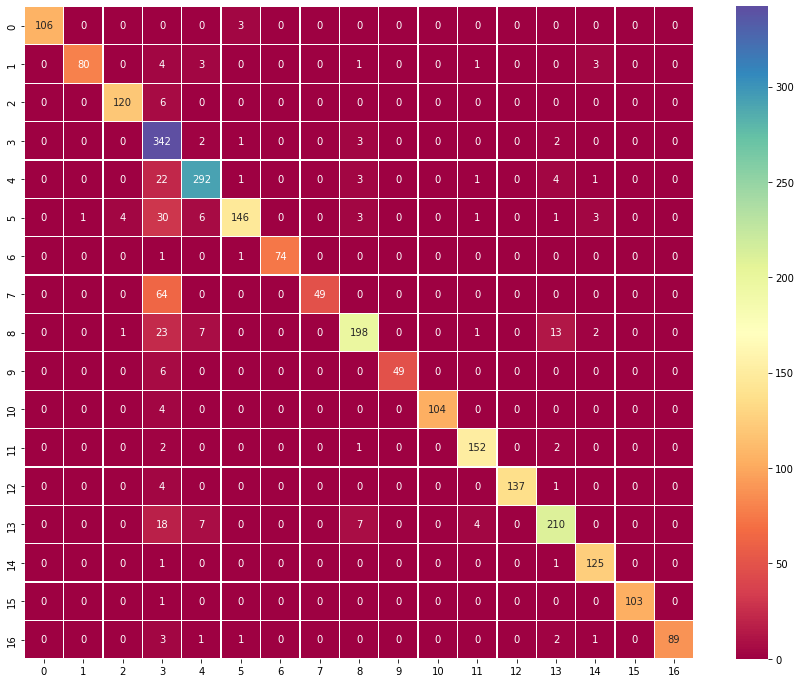

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))
sns.heatmap(cm, annot = True,fmt="d",cmap="Spectral", linewidths=.3 )
plt.show()



---


# **The 'predict' function**

---

## We then declared a function called "predict" which will take "text" as a parameter and convert the text to words with the use of CountVectorizer. 


## It predicts the language with the use of the language coloumn

In [ ]:
def predict(text):
    x = cv.transform([text]).toarray() 
    lang = model.predict(x)
    lang = le.inverse_transform(lang)
    print(lang[0]) 

## Few examples to showcase the working of the model

In [ ]:
predict("Sidharth, Suryaansh and Aparna have worked on this project")

predict("ont travaillé sur ce projete")

predict("عملت كيرثانا سنيها و أبارنا في هذا المشروع")

predict("Sneha, Keerthana y Aparna han trabajado en este código")

predict("സ്നേഹ, കീർത്തന, അപർണ എന്നിവർ ഈ കോഡിൽ പ്രവർത്തിച്ചിട്ടുണ്ട്")

predict("Снеха, Киртана и Апарна работали над этим кодом.")

English
French
Arabic
Spanish
Malayalam
Russian




---


# MANUALLY TESTING THE MODEL

---



Trial:

أهلا - Arabic

Hallo - Dutch

Bonjour - French

Hola - Spanish

---

Trial:

Verabschiedung - German

До свидания - Russian

பிரியாவிடை - Tamil

വിട - Malayalam

---

### Input a phrase here

In [ ]:
a=input()

أهلا


### Detecting the language using function 'predict'

In [ ]:
pl=predict(a)
pl

Spanish


---
# Translation
---
This section of the code will translate the user input into a user given language.

In [ ]:
b=input()

English


Installing Dependencies

In [ ]:
!pip install deep-translator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from deep_translator import GoogleTranslator

Translation Code

In [ ]:
to_translate = a

if(b=="English" or b=="english"):
    translated = GoogleTranslator(source='auto', target='en').translate(to_translate)
elif(b=="French" or b=="french"):
    translated = GoogleTranslator(source='auto', target='fr').translate(to_translate)
elif(b=="Arabic" or b=="arabic"):
    translated = GoogleTranslator(source='auto', target='ar').translate(to_translate)
elif(b=="Spanish" or b=="spanish"):
    translated = GoogleTranslator(source='auto', target='es').translate(to_translate)
elif(b=="German" or b=="german"):
    translated = GoogleTranslator(source='auto', target='de').translate(to_translate)
elif(b=="Portugese" or b=="portugese"):
    translated = GoogleTranslator(source='auto', target='pt').translate(to_translate)
elif(b=="russian" or b=="Russian"):
    translated = GoogleTranslator(source='auto', target='ru').translate(to_translate)
elif(b=="Sweedish" or b=="sweedish"):
    translated = GoogleTranslator(source='auto', target='sv').translate(to_translate)
elif(b=="Dutch" or b=="dutch"):
    translated = GoogleTranslator(source='auto', target='nl').translate(to_translate)
elif(b=="Turkish" or b=="turkish"):
    translated = GoogleTranslator(source='auto', target='tr').translate(to_translate)
elif(b=="Danish" or b=="danish"):
    translated = GoogleTranslator(source='auto', target='da').translate(to_translate)
elif(b=="Greek" or b=="greek"):
    translated = GoogleTranslator(source='auto', target='el').translate(to_translate)
elif(b=="Tamil" or b=="tamil"):
    translated = GoogleTranslator(source='auto', target='ta').translate(to_translate)
elif(b=="Hindi" or b=="hindi"):
    translated = GoogleTranslator(source='auto', target='hi').translate(to_translate)
elif(b=="Kannada" or b=="kannada"):
    translated = GoogleTranslator(source='auto', target='kn').translate(to_translate)
elif(b=="Malayalam" or b=="malayalam"):
    translated = GoogleTranslator(source='auto', target='ml').translate(to_translate)
elif(b=="Italian" or b=="italian"):
    translated = GoogleTranslator(source='auto', target='it').translate(to_translate)

print("The translation of ",a," to ",b," is ",translated)

The translation of  أهلا  to  English  is  Hello


---